# Set-Up Environment

In [1]:
import pandas as pd
import seaborn as sns
import sklearn as skl
import numpy as np
import matplotlib as mpl

# Load in the Pickled Dataset

In [2]:
data = pd.read_pickle('clean_data_for_modelling4.p')
data.head()

,viewer_id,one_day_mins,two_day_mins,seven_day_mins,one_sim,two_sim,seven_sim,sixteen_twentyfour,sixteen_thirtyfour,affluency,...,boi_within_seven_days,hub_plus_tenure,dau_within_seven_days,avg_sessions,churn_binary,p_affluence_v2,registration_source,completed_programmes,avg_completion,p_0172_prop_tv_ondemand_subscription_v1b
0,b7f553d1-cc69-429d-8e54-0dca4f0d7c6b,90.463783,135.209417,314.081983,0.000000,0.000000,0.000000,1.0,1.0,0.0,...,4,1,7,1,1,1,0,3,0.869324,0.2291
1,bd0e78fc-dd7d-48cf-b96d-a2d0a582e12c,207.098683,252.062217,363.294617,0.000000,0.000000,0.000000,1.0,1.0,0.0,...,2,1,6,1,1,17,1,4,0.940683,0.0000
2,6bde74b4-7533-45e9-9e94-1e393415eb81,45.839350,45.839350,90.144717,0.000000,0.000000,0.000000,1.0,1.0,0.0,...,2,2,3,1,1,2,1,1,0.989718,0.0000
3,7bd1e296-7e7d-44e9-a3cd-9e0b6a3cd609,45.386000,45.386000,45.386000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1,1,2,1,1,11,1,1,1.000059,0.0000
4,4dfed92c-bb72-498a-b12f-bdb0d4f2e03c,47.805117,47.805117,47.805117,1.239867,1.239867,1.239867,0.0,0.0,0.0,...,1,1,1,1,1,18,1,1,1.017852,0.0000


# Look for Correlation between Predictor Variables and Target Variable

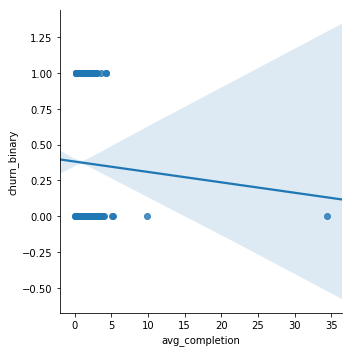

In [3]:
%matplotlib inline
import seaborn as sns
sns.lmplot(x='avg_completion', y='churn_binary', data=data, fit_reg=True) 

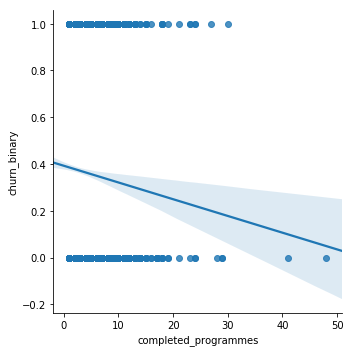

In [4]:
sns.lmplot(x='completed_programmes', y='churn_binary', data=data, fit_reg=True) 

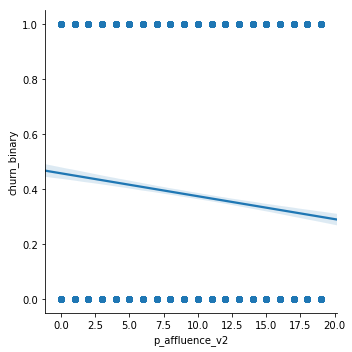

In [5]:
sns.lmplot(x='p_affluence_v2', y='churn_binary', data=data, fit_reg=True)

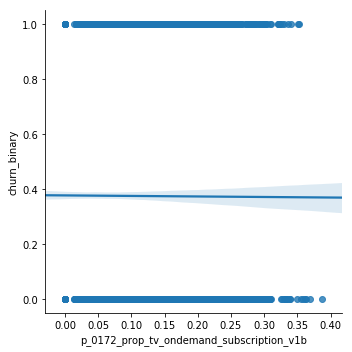

In [6]:
sns.lmplot(x='p_0172_prop_tv_ondemand_subscription_v1b', y='churn_binary', data=data, fit_reg=True)

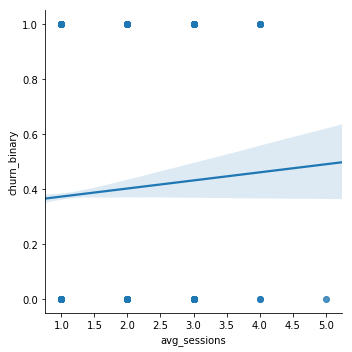

In [15]:
sns.lmplot(x='avg_sessions', y='churn_binary', data=data, fit_reg=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6948 entries, 0 to 6947
Data columns (total 22 columns):
viewer_id                                   6948 non-null object
one_day_mins                                6948 non-null float64
two_day_mins                                6948 non-null float64
seven_day_mins                              6948 non-null float64
one_sim                                     6948 non-null float64
two_sim                                     6948 non-null float64
seven_sim                                   6948 non-null float64
sixteen_twentyfour                          6948 non-null float64
sixteen_thirtyfour                          6948 non-null float64
affluency                                   6948 non-null float64
female_flag                                 6948 non-null float64
hub_tenure                                  6948 non-null float64
boi_within_seven_days                       6948 non-null int64
hub_plus_tenure                       

In [37]:
data = data(['viewer_id', 'one_day_minutes', 'two_day_minutes', 'seven_day_minutes', 'one_sim', 'two_sim', 'seven_sim',
             'sixteen_twentyfour', 'sixteen_thirtyfour', 'affluency', 'female_flag', 'hub_tenure', 
             'boi_within_seven_days', 'hub_plus_tenure', 'dau_within_seven_days', 'avg_sessions', 'p_affluence_v2',
             'registration_source', 'completed_programmes', 'avg_completion',
             'p_0172_prop_tv_ondemand_subscription_v1b', 'churn_binary'])

# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
dataframe = data
array = dataframe.values
X = array[:,1:21]
Y = array[:,21]
Y = Y.astype(float)
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

TypeError: 'DataFrame' object is not callable

# Split the Data into Training and Test Sets

In [38]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,['one_day_mins','two_day_mins', 'seven_day_mins',
                                                                'one_sim', 'two_sim','seven_sim', 'sixteen_twentyfour',
                                                                'sixteen_thirtyfour', 'affluency','female_flag',
                                                                'hub_tenure', 'boi_within_seven_days',
                                                                'dau_within_seven_days', 'avg_sessions', 
                                                                'p_affluence_v2', 'registration_source',
                                                                'completed_programmes', 'avg_completion',
                                                                'p_0172_prop_tv_ondemand_subscription_v1b']], 
                                                    data['churn_binary'], test_size=0.3, 
                                                    random_state=67)

# Generate the Feature Union, Pipeline and Gridsearch to create the best model possible

In [39]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from pyearth import Earth

X = X_train 
Y = y_train

# create feature union (pirinciple coordinate analysis, random forest to find top variables)
features = []
features.append(('pca', PCA(n_components=12))) #calculate x principal components
features.append(('select_best', SelectKBest(k=12))) #find the best y principal components
feature_union = FeatureUnion(features)

# create pipeline LogisticRegression(), svm.LinearSVC(), svm.SVR(), RandomForestClassifier(), 
## GradientBoostingClassifier(), MLPClassifier()
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('GBC', GradientBoostingClassifier())) 
model = Pipeline(estimators)

# set up gridsearch to find the best parameter values specified in the ranges below
parameters = {'feature_union__pca__n_components':[1, 19], 'feature_union__select_best__k':[1, 19]}
clf = GridSearchCV(model, parameters)
model2 = clf.fit(X, Y)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_feature_union__pca__n_components',
 'param_feature_union__select_best__k',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

# Check the Accuracy of the Model Against the Test Set

In [21]:
## note that accuracy score only works for discrete values, i.e. integers, for continuous
## variables, you will have to use metrics like MSE, metrics.mean_square_error()
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, model2.predict(X_test))
print(acc)

0.620623501199


In [18]:
from sklearn.metrics import roc_curve
roc_curve(y_test, model2.predict(X_test))

(array([ 0.        ,  0.10291938,  1.        ]),
 array([ 0.        ,  0.18747896,  1.        ]),
 array([2, 1, 0], dtype=int64))

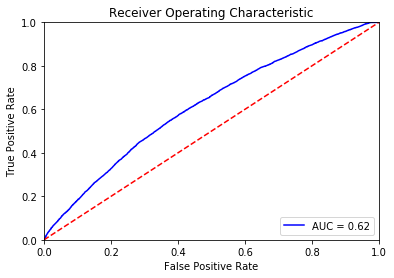

In [19]:
from sklearn import metrics

probs = model2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.64      0.87      0.74      1295
          1       0.49      0.21      0.30       790

avg / total       0.59      0.62      0.57      2085

